# Malarial Diagnosis

We will give the blood report and it will detect whether it has malaria or not(Parasited or Uninfected)

We will be dealing with image data throughout.
And as it is the problem and we have to say whether it is a parasited or not, so it is
## **binary classification problem**

**1 : Uninfected
0 : Parasited**




## About Dataset

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.
[Check out dataset by clicking here](https://www.tensorflow.org/datasets/catalog/malaria)

Feature Description :
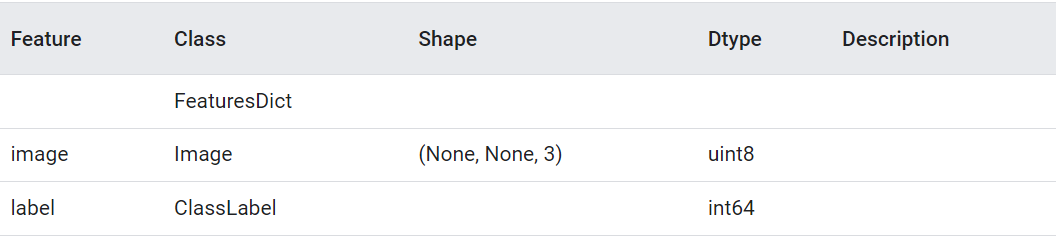

In [ ]:
#Importing essential libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.models import Model
from keras.layers import Layer
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision,Recall

In [3]:
dataset, dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete5QC42R/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [4]:
for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


# **DATA PREPARATION**

More info on [CNN Explainer](https://poloclub.github.io/cnn-explainer/)


In [5]:
def split_dataset(dataset, trainr, valr, testr):
  dataset_size = len(dataset)

  train_dataset = dataset.take(int(trainr*dataset_size))

  val_test_dataset = dataset.skip(int(trainr*dataset_size))
  val_dataset = val_test_dataset.take(int(valr*dataset_size))

  test_dataset = val_test_dataset.skip(int(valr*dataset_size))
  return train_dataset, val_dataset, test_dataset

In [6]:
trainr = 0.8
valr = 0.1
testr = 0.1

train_dataset, val_dataset, test_dataset = split_dataset(dataset[0], trainr, valr, testr )

# **DATA VISUALISATION**

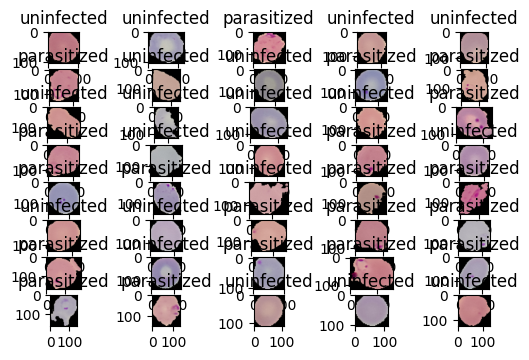

In [7]:
for i,(image,label) in enumerate(train_dataset.take(40)):
  axi = plt.subplot(10,5,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

# **DATA PREPROCESSING**

In [8]:
IMG_SIZE = 224
def image_modify(image,label):
  return tf.image.resize(image,(IMG_SIZE,IMG_SIZE))/255.0,label

In [9]:
train_dataset = train_dataset.map(image_modify)
val_dataset = val_dataset.map(image_modify)
test_dataset = test_dataset.map(image_modify)


train_dataset
test_dataset
val_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [11]:
from os import terminal_size
train_dataset = train_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset
test_dataset
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# **MODEL CREATION AND TRAINING**

In [12]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IMG_SIZE,IMG_SIZE,3)),
    Conv2D(filters=6,kernel_size = 3,strides = 1,padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides=2),

    Conv2D(filters=16,kernel_size = 3,strides = 1,padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides=2),

    Flatten(),

    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(10,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')

])

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                        

# **FUNCTIONAL API**

Model for Extracting features : feature_extraction_model

Behaves as functional API :

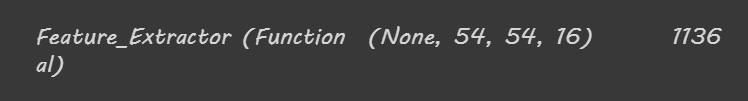

In [13]:
func_input = Input((IMG_SIZE,IMG_SIZE,3),name = 'Input Image')

x =  Conv2D(filters=6,kernel_size = 3,strides = 1,padding = 'valid', activation = 'relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2,strides=2)(x)
x = Conv2D(filters=16,kernel_size = 3,strides = 1,padding = 'valid', activation = 'relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size = 2,strides=2)(x)


feature_extraction_model  = Model(func_input,output,name='Feature_Extractor')

feature_extraction_model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16

In [14]:
func_input = Input((IMG_SIZE,IMG_SIZE,3),name = 'Input Image')

x = feature_extraction_model(func_input)

x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10,activation='relu')(x)
x = BatchNormalization()(x)
func_output = Dense(1,activation='sigmoid')(x)

lenet_model_functional = Model(func_input,func_output,name='Lenet_Model')

lenet_model_functional.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Function  (None, 54, 54, 16)       1136      
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                

In [15]:
feature_extractor_seq_model = tf.keras.Sequential([
                             InputLayer(input_shape = (IMG_SIZE, IMG_SIZE, 3)),

                             Conv2D(filters = 6, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides= 2),

                             Conv2D(filters = 16, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides= 2)
])
feature_extractor_seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

# **CALLABLE MODEL**

In [16]:
func_input = Input(shape = (IMG_SIZE, IMG_SIZE, 3), name = "Input Image")

x = feature_extractor_seq_model(func_input)

x = Flatten()(x)

x = Dense(100, activation = "relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation = "sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name = "Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 54, 54, 16)        1136      
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                       

# **MODEL SUBCLASSING**

In [17]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    self.conv1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch1 = BatchNormalization()
    self.pool1 = MaxPool2D (pool_size = pool_size, strides= 2*strides)

    self.conv2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch2 = BatchNormalization()
    self.pool2 = MaxPool2D (pool_size = pool_size, strides= 2*strides)

  def call(self, x, training):

    x = self.conv1(x)
    x = self.batch1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.batch2(x)
    x = self.pool2(x)

    return x

feature_subclassing = FeatureExtractor(8, 3, 1, "valid", "relu", 2)

In [18]:
func_input = Input(shape = (IMG_SIZE, IMG_SIZE, 3), name = "Input Image")

x = feature_subclassing(func_input)

x = Flatten()(x)

x = Dense(100, activation = "relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation = "sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name = "Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (FeatureE  (None, 54, 54, 16)       1488      
 xtractor)                                                       
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_9 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_14 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 10)                

In [37]:
class Lenet_Model(Model):
  def __init__(self):
   super(Lenet_Model,self).__init__()

   self.feature_extractor = FeatureExtractor(8,3,1,"valid","relu",2)
   self.flatten = Flatten()

   self.dense1 = Dense(100, activation = "relu")
   self.batch1 = BatchNormalization()

   self.dense2 = Dense(10, activation = "relu")
   self.batch2 = BatchNormalization()

   self.dense3 = Dense(1,activation="sigmoid")

  def call(self,x,training):
    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.batch1(x)
    x = self.dense2(x)
    x = self.batch2(x)
    x = self.dense3(x)
    return x

Lenet_sub_class_model = Lenet_Model()
Lenet_sub_class_model(tf.zeros([1,224,224,3]))
Lenet_sub_class_model.summary()

Model: "lenet__model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_2 (Featur  multiple                 1488      
 eExtractor)                                                     
                                                                 
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_22 (Bat  multiple                 400       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_23 (Bat  multiple              

In [19]:
y_true = [0,1,0,0]
y_predict = [0.6,0.51,0.94,1]
bcross = tf.keras.losses.BinaryCrossentropy(from_logits = True)
bcross(y_true,y_predict)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0227046>

In [39]:
Lenet_sub_class_model.compile(optimizer = Adam(learning_rate = 0.01),loss=BinaryCrossentropy(),metrics='accuracy')

In [30]:
# lenet_model_functional.compile(optimizer = Adam(learning_rate = 0.01),loss=BinaryCrossentropy(),metrics='accuracy')

In [ ]:
# history = lenet_model_functional.fit(train_dataset,validation_data = val_dataset,epochs = 5,verbose = 1)
history = Lenet_sub_class_model.fit(train_dataset,validation_data = val_dataset,epochs = 5,verbose = 1)

In [23]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Epoch vs losses of Model')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train_loss','val_loss'])
# plt.show()

In [24]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Accuracy and Val accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_accuracy','val_accuracy'])
# plt.show()

In [ ]:
# lenet_model.predict(train_dataset.take(1)).shape
Lenet_sub_class_model.predict(train_dataset.take(1)).shape

**MODEL EVALUATION**

In [ ]:
# lenet_model.evaluate(test_dataset)
Lenet_sub_class_model.evaluate(test_dataset)

In [ ]:
# lenet_model.predict(test_dataset.take(1))[0][0]
Lenet_sub_class_model.predict(test_dataset.take(1))[0][0]

In [45]:
def logic_classify(x):
  if(x<0.5):
   return str('Pa')
  else:
   return str('Un')

In [ ]:
for i,(image,label) in enumerate(test_dataset.take(16)):
  axi = plt.subplot(4,4,i+1)
  plt.imshow(image[0])
  plt.title(str(logic_classify(label.numpy()[0])) + " " + str(logic_classify(Lenet_sub_class_model.predict(image)[0][0])))
  plt.axis('off')